In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

fp_entries = './data/expenditures_transposed_30082020.csv'
fp_personal_info = './data/alerj_personal_transposed.csv'
fp_cost_center = './data/cost_center_transposed.csv'

entries = pd.read_csv(fp_entries, sep='|')
personal = pd.read_csv(fp_personal_info, sep=',')
cost_center = pd.read_csv(fp_cost_center, sep='|')

In [3]:
entries['congressman_id'] = entries['congressman_id'].astype(float).astype(int) 

In [4]:
entries_personal = entries.merge(personal, on='congressman_id')
entries_personal = entries_personal.drop(columns=['name', 'nickname']) 

In [5]:
complete = entries_personal.merge(cost_center, left_on='cost_center_id', right_on='id')
complete = complete.drop(columns=['id'])
complete.rename(columns={"name": "cost_center_name"}, inplace=True)

In [6]:
complete_clean = complete[['congressman_id', 'congressman_name', 'congressman_nickname', 'party_code', 'party_name', 'email',
                           'date', 'value', 'object', 'to', 'cost_center_id', 'cost_center_name']]

In [7]:
complete_clean.head()

,congressman_id,congressman_name,congressman_nickname,party_code,party_name,email,date,value,object,to,cost_center_id,cost_center_name
0,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-05-18 14:36:39,-6500.0,LOCAÇÃO DE VEÍCULO COROLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
1,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-04-18 13:36:31,-6500.0,LOCAÇÃO DE VEÍCULO COROLLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
2,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-03-18 15:20:06,-6500.0,Locação de Veículo Corolla,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
3,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-01-18 18:17:43,-6500.0,Locação de veículo Corolla,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
4,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2019-12-18 15:44:01,-6500.0,LOCAÇÃO DE VEÍCULO BLINDADO TOYOTA COROLLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...


In [8]:
# complete_clean.to_csv('./data/complete_30082020.csv')

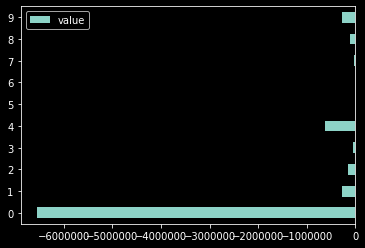

In [9]:
import matplotlib.pyplot as plt  
plt.style.use('dark_background')
complete_clean.groupby(['cost_center_name'])['value'].sum().reset_index().head(10).plot(kind='barh')

In [10]:
complete_clean.groupby(['cost_center_name'])['value'].sum().reset_index().sort_values(by=['value'])

,cost_center_name,value
0,4 - Devolução de saldo,-6557976.51
18,VI.a - Locação ou fretamento de veículos autom...,-4601960.16
21,VIII - Divulgação de sua atividade parlamentar...,-1654644.31
20,VII - Combustíveis e lubrificantes,-1291786.55
4,III.a - Locação de imóveis,-624080.03
1,I - Passagens aéreas e terrestres,-272879.49
9,IV.a - Locação de móveis e equipamentos,-271419.58
17,VI - Outras despesas com locomoção,-207034.78
2,II - Serviços e produtos postais previstos nos...,-153129.09
8,IV - Custeio de despesas vinculadas ao Gabinet...,-106327.43


In [11]:
complete_clean[complete_clean['cost_center_name'] == 'VI - Outras despesas com locomoção']

,congressman_id,congressman_name,congressman_nickname,party_code,party_name,email,date,value,object,to,cost_center_id,cost_center_name
3700,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-02-18 14:38:57,-6500.00,Locação de Veículo Corolla,HORIZONTE LOCADORA DE VEÍCULOS,20,VI - Outras despesas com locomoção
3701,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-01-06 20:14:17,-100.00,transporte,METRO RIO,20,VI - Outras despesas com locomoção
3702,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2019-11-12 16:50:49,-50.00,TRANSPORTE PUBLICO,METRO RIO,20,VI - Outras despesas com locomoção
3703,69,Wanderson Gimenes Alexandre,Anderson Alexandre,SDD,Solidariedade,andersonalexandre@alerj.rj.gov.br,2020-05-27 17:36:49,-784.20,Pedágio,CGMP CENTRO DE GESTAO DE MEIOS DE PAGAMENTO LTDA,20,VI - Outras despesas com locomoção
3704,69,Wanderson Gimenes Alexandre,Anderson Alexandre,SDD,Solidariedade,andersonalexandre@alerj.rj.gov.br,2020-04-30 20:39:15,-709.60,Pedágio,CGMP CENTRO DE GESTAO DE MEIOS DE PAGAMENTO LTDA,20,VI - Outras despesas com locomoção
3705,69,Wanderson Gimenes Alexandre,Anderson Alexandre,SDD,Solidariedade,andersonalexandre@alerj.rj.gov.br,2020-03-22 14:49:43,-1153.20,Pedágio,CGMP CENTRO DE GESTAO DE MEIOS DE PAGAMENTO LTDA,20,VI - Outras despesas com locomoção
3706,69,Wanderson Gimenes Alexandre,Anderson Alexandre,SDD,Solidariedade,andersonalexandre@alerj.rj.gov.br,2020-02-29 19:26:31,-1117.80,Pedágio,CGMP CENTRO DE GESTAO DE MEIOS DE PAGAMENTO LTDA,20,VI - Outras despesas com locomoção
3707,69,Wanderson Gimenes Alexandre,Anderson Alexandre,SDD,Solidariedade,andersonalexandre@alerj.rj.gov.br,2020-01-30 15:42:00,-582.40,Sem parar,CGMP CENTRO DE GESTAO DE MEIOS DE PAGAMENTO LTDA,20,VI - Outras despesas com locomoção
3708,70,Bagueira,Bagueira,SDD,Solidariedade,bagueira@alerj.rj.gov.br,2020-04-30 02:34:54,-195.50,Pedágios,Cia Bras de Soluções e Serviços - ALELO,20,VI - Outras despesas com locomoção
3709,70,Bagueira,Bagueira,SDD,Solidariedade,bagueira@alerj.rj.gov.br,2020-03-31 20:38:48,-233.90,Pedágios,Cia Bras de Soluções e Serviços - ALELO,20,VI - Outras despesas com locomoção


In [12]:
complete_clean[complete_clean['cost_center_name'].str.startswith('VI.b', na=False)]

,congressman_id,congressman_name,congressman_nickname,party_code,party_name,email,date,value,object,to,cost_center_id,cost_center_name
4937,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-11 00:11:17,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4938,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-11 00:11:17,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4939,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-11 00:11:21,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4940,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-05 00:06:47,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4941,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-05 00:08:16,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4942,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-11 00:11:17,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4943,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-03-11 00:11:21,-190.00,MOTORISTA DE APLICATIVO,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4944,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-02-19 17:07:13,-190.00,Motorista de aplicativo,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4945,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-02-18 17:04:59,-380.00,Motorista de aplicativo,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."
4946,2,Alexandre Freitas,Alexandre Freitas,NOVO,Partido Novo,alexandrefreitas@alerj.rj.gov.br,2020-02-19 17:06:05,-190.00,Motorista de aplicativo,UBER DO BRASIL TECNOLOGIA LTDA,22,"VI.b - Serviços de táxi, serviços de transport..."


In [13]:
complete_clean.head()

,congressman_id,congressman_name,congressman_nickname,party_code,party_name,email,date,value,object,to,cost_center_id,cost_center_name
0,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-05-18 14:36:39,-6500.0,LOCAÇÃO DE VEÍCULO COROLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
1,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-04-18 13:36:31,-6500.0,LOCAÇÃO DE VEÍCULO COROLLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
2,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-03-18 15:20:06,-6500.0,Locação de Veículo Corolla,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
3,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2020-01-18 18:17:43,-6500.0,Locação de veículo Corolla,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
4,1,Alana Passos,Alana Passos,PSL,Partido Social Liberal,alanapassos@alerj.rj.gov.br,2019-12-18 15:44:01,-6500.0,LOCAÇÃO DE VEÍCULO BLINDADO TOYOTA COROLLA,HORIZONTE LOCADORA DE VEÍCULOS,21,VI.a - Locação ou fretamento de veículos autom...
